# Painlevé Comparison

In [1]:
using Distributed
addprocs()
@everywhere using OperatorApproximation
@everywhere using RogueWaveInfiniteNLS
@everywhere using Plots
@everywhere using HDF5
@everywhere using LaTeXStrings

## Preliminary stuff

In [2]:
# Works. Due to the weird rounding of the tick values under the log scale.
mycoefplot(f::BasisExpansion{T};kwargs...) where T = plot(abs.(f.c) .+ eps(); yaxis = :log, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16], tickfontsize=10, kwargs...)
mycoefplot!(f::BasisExpansion{T};kwargs...) where T = plot!(abs.(f.c) .+ eps(); yaxis = :log, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16], tickfontsize=10, kwargs...)
mycoefplot!(p,f::BasisExpansion{T};kwargs...) where T = plot!(p,abs.(f.c) .+ eps(); yaxis = :log, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16], tickfontsize=10, kwargs...)

function mycoefplot(f::BasisExpansion{T};kwargs...) where T <: DirectSum
    p = mycoefplot(f[1];kwargs...)
    for i = 2:length(f)
        mycoefplot!(p,f[i];kwargs...)
    end
    p
end

mycoefplot (generic function with 2 methods)

In [115]:
@everywhere ygrid_exact = collect(-0.2:0.005:0.2)
# @everywhere ygrid_dsamp = collect(-0.2:0.01:0.2)
@everywhere ygrid_dsamp = collect(-2:0.1:2)
@everywhere function vfromXy(X, y)
    return y/(2^(5/2)*3^(7/6)*X^(1/3)) + VCRIT
end

In [117]:
length(ygrid_dsamp)

41

In [119]:
vfromXy(400,4)

0.16272006385294574

## Try for X=Xfixed1

In [121]:
@everywhere Xfixed1 = 4000
@everywhere atest = 1
@everywhere btest = 1
@everywhere n = 150
@everywhere vgrid_dsamp1 = vfromXy.(Xfixed1,ygrid_dsamp)
@everywhere compute_rwio_Pain_ver1 = v->rwio_Painleve(Xfixed1,v,atest,btest,n)

In [63]:
outnlsPain_ver1, outrhpPain_ver1, outrhp_solverPain_ver1, outUPain_ver1, outu1Pain_ver1, outu2Pain_ver1 = rwio_Painleve_RHP(Xfixed1,vgrid_dsamp1[end],atest,btest, n);

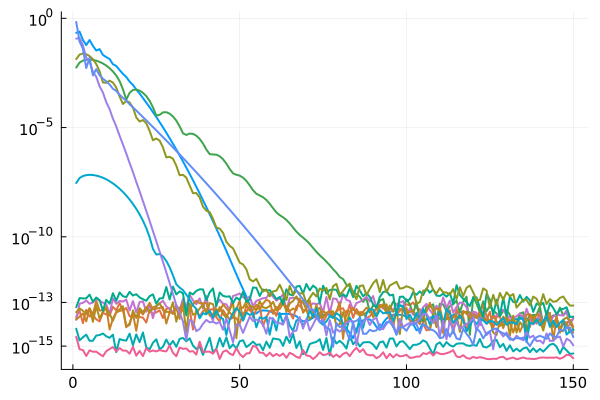

In [64]:
mycptPain_ver1 = mycoefplot(outu1Pain_ver1[1], legend = false, linewidth= 2)

In [123]:
outpsiPain_ver1 = pmap(compute_rwio_Pain_ver1, vgrid_dsamp1);

In [124]:
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "Xfixed", Xfixed1)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "vgrid_dsamp", vgrid_dsamp1)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "ygrid_dsamp", ygrid_dsamp)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "psi", outpsiPain_ver1)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "aval", atest)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "bval", btest)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "realpsi", real.(outpsiPain_ver1))
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "imagpsi", imag.(outpsiPain_ver1))
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_4000.h5", "abspsi", abs.(outpsiPain_ver1))

## Try for fixed X=X2

In [127]:
@everywhere Xfixed2 = 40000
@everywhere atest = 1
@everywhere btest = 1
@everywhere n = 150
@everywhere vgrid_dsamp2 = vfromXy.(Xfixed2,ygrid_dsamp)
@everywhere compute_rwio_Pain_ver2 = v->rwio_Painleve(Xfixed2,v,atest,btest,n)

In [77]:
outnlsPain_ver2, outrhpPain_ver2, outrhp_solverPain_ver2, outUPain_ver2, outu1Pain_ver2, outu2Pain_ver2 = rwio_Painleve_RHP(Xfixed2,vgrid_dsamp2[end],atest,btest, n);

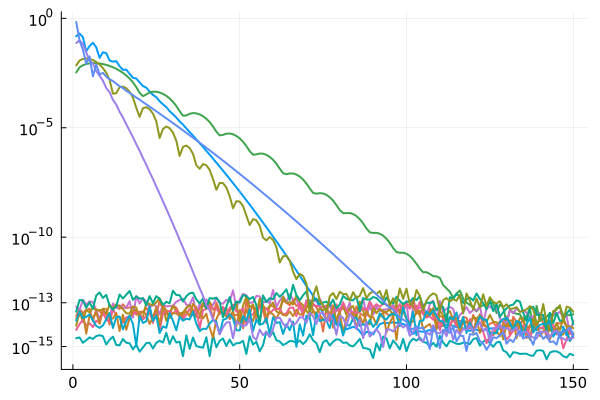

In [74]:
mycptPain_ver2 = mycoefplot(outu1Pain_ver2[1], legend = false, linewidth= 2)

In [129]:
outpsiPain_ver2 = pmap(compute_rwio_Pain_ver2, vgrid_dsamp2);

In [130]:
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "Xfixed", Xfixed2)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "vgrid_dsamp", vgrid_dsamp2)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "ygrid_dsamp", ygrid_dsamp)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "psi", outpsiPain_ver2)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "aval", atest)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "bval", btest)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "realpsi", real.(outpsiPain_ver2))
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "imagpsi", imag.(outpsiPain_ver2))
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_40000.h5", "abspsi", abs.(outpsiPain_ver2))

## Try for fixed X=X3

In [133]:
@everywhere Xfixed3 = 400000
@everywhere atest = 1
@everywhere btest = 1
@everywhere n = 200
@everywhere vgrid_dsamp3 = vfromXy.(Xfixed3, ygrid_dsamp)
@everywhere compute_rwio_Pain_ver3 = v->rwio_Painleve(Xfixed3,v,atest,btest,n)

In [89]:
outnlsPain_ver3, outrhpPain_ver3, outrhp_solverPain_ver3, outUPain_ver3, outu1Pain_ver3, outu2Pain_ver3 = rwio_Painleve_RHP(Xfixed3,vgrid_dsamp3[end],atest,btest, n);

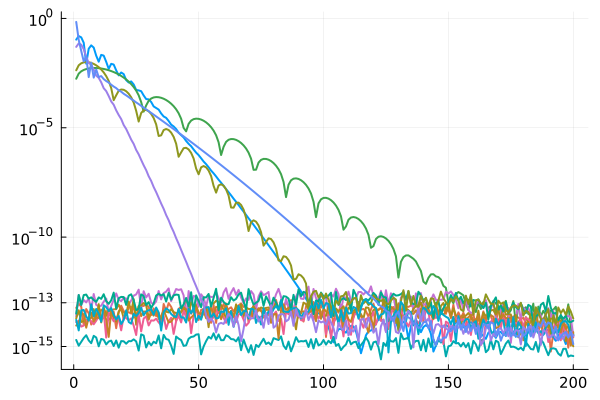

In [93]:
mycptPain_ver3 = mycoefplot(outu1Pain_ver3[1], legend = false, linewidth= 2)

In [135]:
outpsiPain_ver3 = pmap(compute_rwio_Pain_ver3, vgrid_dsamp3);

In [136]:
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "Xfixed", Xfixed3)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "vgrid_dsamp", vgrid_dsamp3)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "ygrid_dsamp", ygrid_dsamp)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "psi", outpsiPain_ver3)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "aval", atest)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "bval", btest)
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "realpsi", real.(outpsiPain_ver3))
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "imagpsi", imag.(outpsiPain_ver3))
h5write("rwio-OA-a_1-b_1-Pain-ygridBig-X_400000.h5", "abspsi", abs.(outpsiPain_ver3))

# Painlevé Region Vertical Compute

In [42]:
@everywhere ygrid_dsamp = collect(-1:0.01:1)
@everywhere function vfromXy(X, y)
    return y/(2^(5/2)*3^(7/6)*X^(1/3)) + VCRIT
end

In [60]:
length(ygrid_dsamp)

201

In [62]:
vfromXy.(4000,ygrid_dsamp)

201-element Vector{Float64}:
 0.132991778589661
 0.13302268843864393
 0.13305359828762686
 0.1330845081366098
 0.13311541798559273
 0.13314632783457567
 0.1331772376835586
 0.13320814753254154
 0.13323905738152447
 0.1332699672305074
 0.13330087707949034
 0.13333178692847325
 0.13336269677745619
 ⋮
 0.13883374004743543
 0.13886464989641834
 0.13889555974540127
 0.1389264695943842
 0.13895737944336714
 0.13898828929235008
 0.139019199141333
 0.13905010899031595
 0.13908101883929888
 0.13911192868828182
 0.13914283853726475
 0.1391737483862477

In [64]:
VCRIT

0.13608276348795434

0.9772859925895983

In [70]:
@everywhere Xfixed1 = 4000
@everywhere atest = 1
@everywhere btest = 1
@everywhere n = 150
@everywhere vgrid_dsamp1 = vfromXy.(Xfixed1,ygrid_dsamp)
@everywhere compute_rwio_Pain_ver1 = v->rwio_Painleve(Xfixed1,v,atest,btest,n)

In [72]:
outnlsPain_ver1, outrhpPain_ver1, outrhp_solverPain_ver1, outUPain_ver1, outu1Pain_ver1, outu2Pain_ver1 = rwio_Painleve_RHP(Xfixed1,vgrid_dsamp1[1],atest,btest, n);

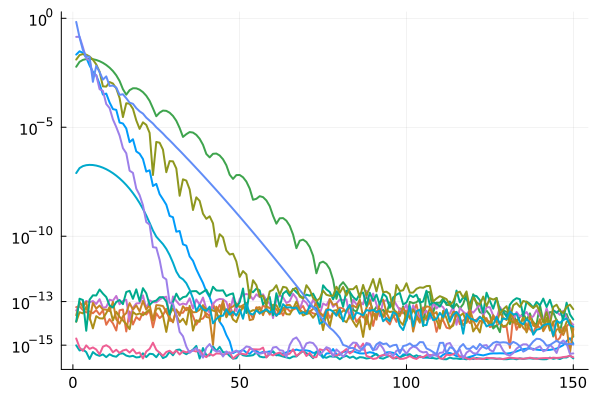

In [74]:
mycptPain_ver1 = mycoefplot(outu1Pain_ver1[1], legend = false, linewidth= 2)

In [ ]:
outTritronqueeVvals = pmap(TritronqueeVmap,ygrid)

h5write("P2dataForV_y1.h5", "ygrid", ygrid)
h5write("P2dataForV_y1.h5", "tauval", tauval)
h5write("P2dataForV_y1.h5", "realV", real.(outTritronqueeVvals))
h5write("P2dataForV_y1.h5", "imagV", imag.(outTritronqueeVvals))
h5write("P2dataForV_y1.h5", "absV", abs.(outTritronqueeVvals))